In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
#Data checking
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Check Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Jeremmy\AppData\Local\Temp\ipykernel_13016\944146720.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


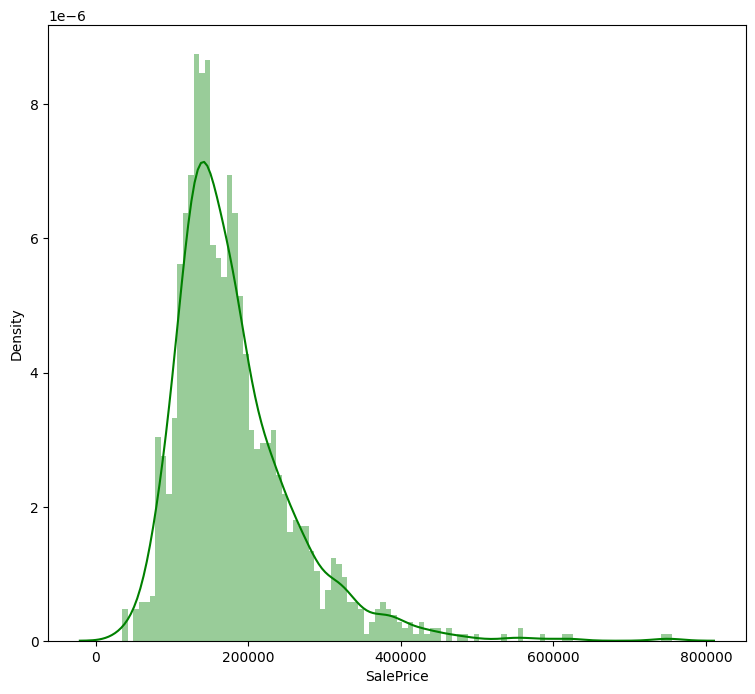

In [6]:
#'SalePrice' is the column to predict
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [7]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<Axes: >

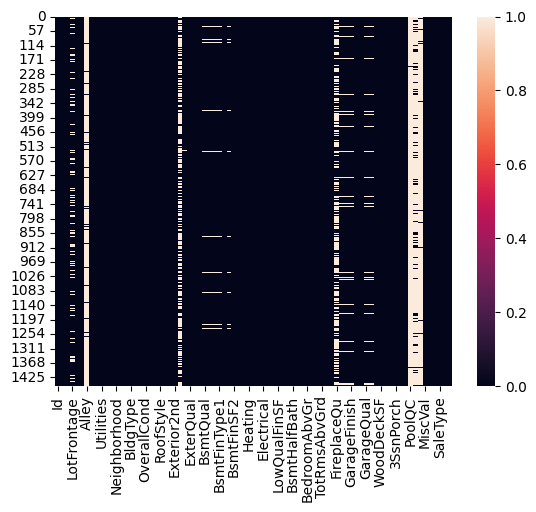

In [8]:
sns.heatmap(df.isnull(),vmin=0, vmax=1)

In [9]:
#Check percentage info of missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
filtered_missing_percentage = missing_percentage[missing_percentage > 0]
print(filtered_missing_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [10]:
df.set_index('Id', inplace=True)
df=df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature', ], axis='columns')
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<Axes: ylabel='Id'>

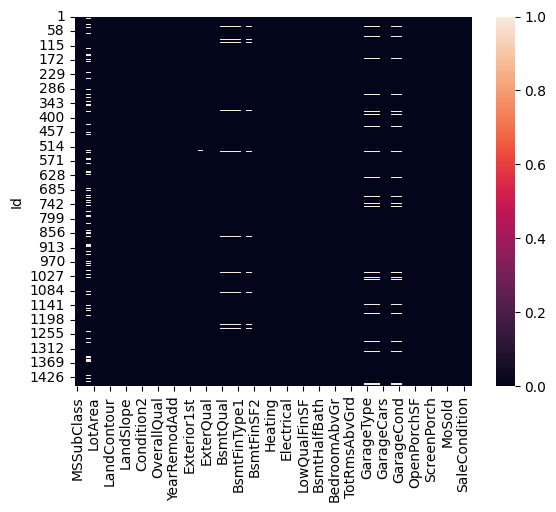

In [11]:
sns.heatmap(df.isnull(),vmin=0, vmax=1)

In [12]:
df = df.dropna()

<Axes: ylabel='Id'>

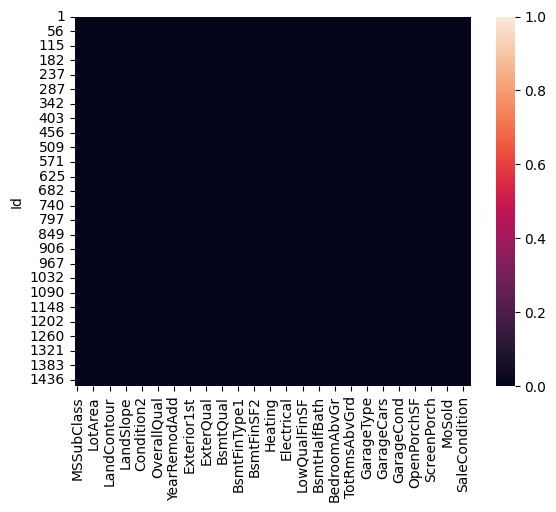

In [13]:
sns.heatmap(df.isnull(),vmin=0, vmax=1)

In [14]:
df.shape

(1094, 74)

In [15]:
df['LotArea'] = df['LotArea'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# label encding
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype=='category':
        df[col]=LabelEncoder().fit_transform(df[col])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


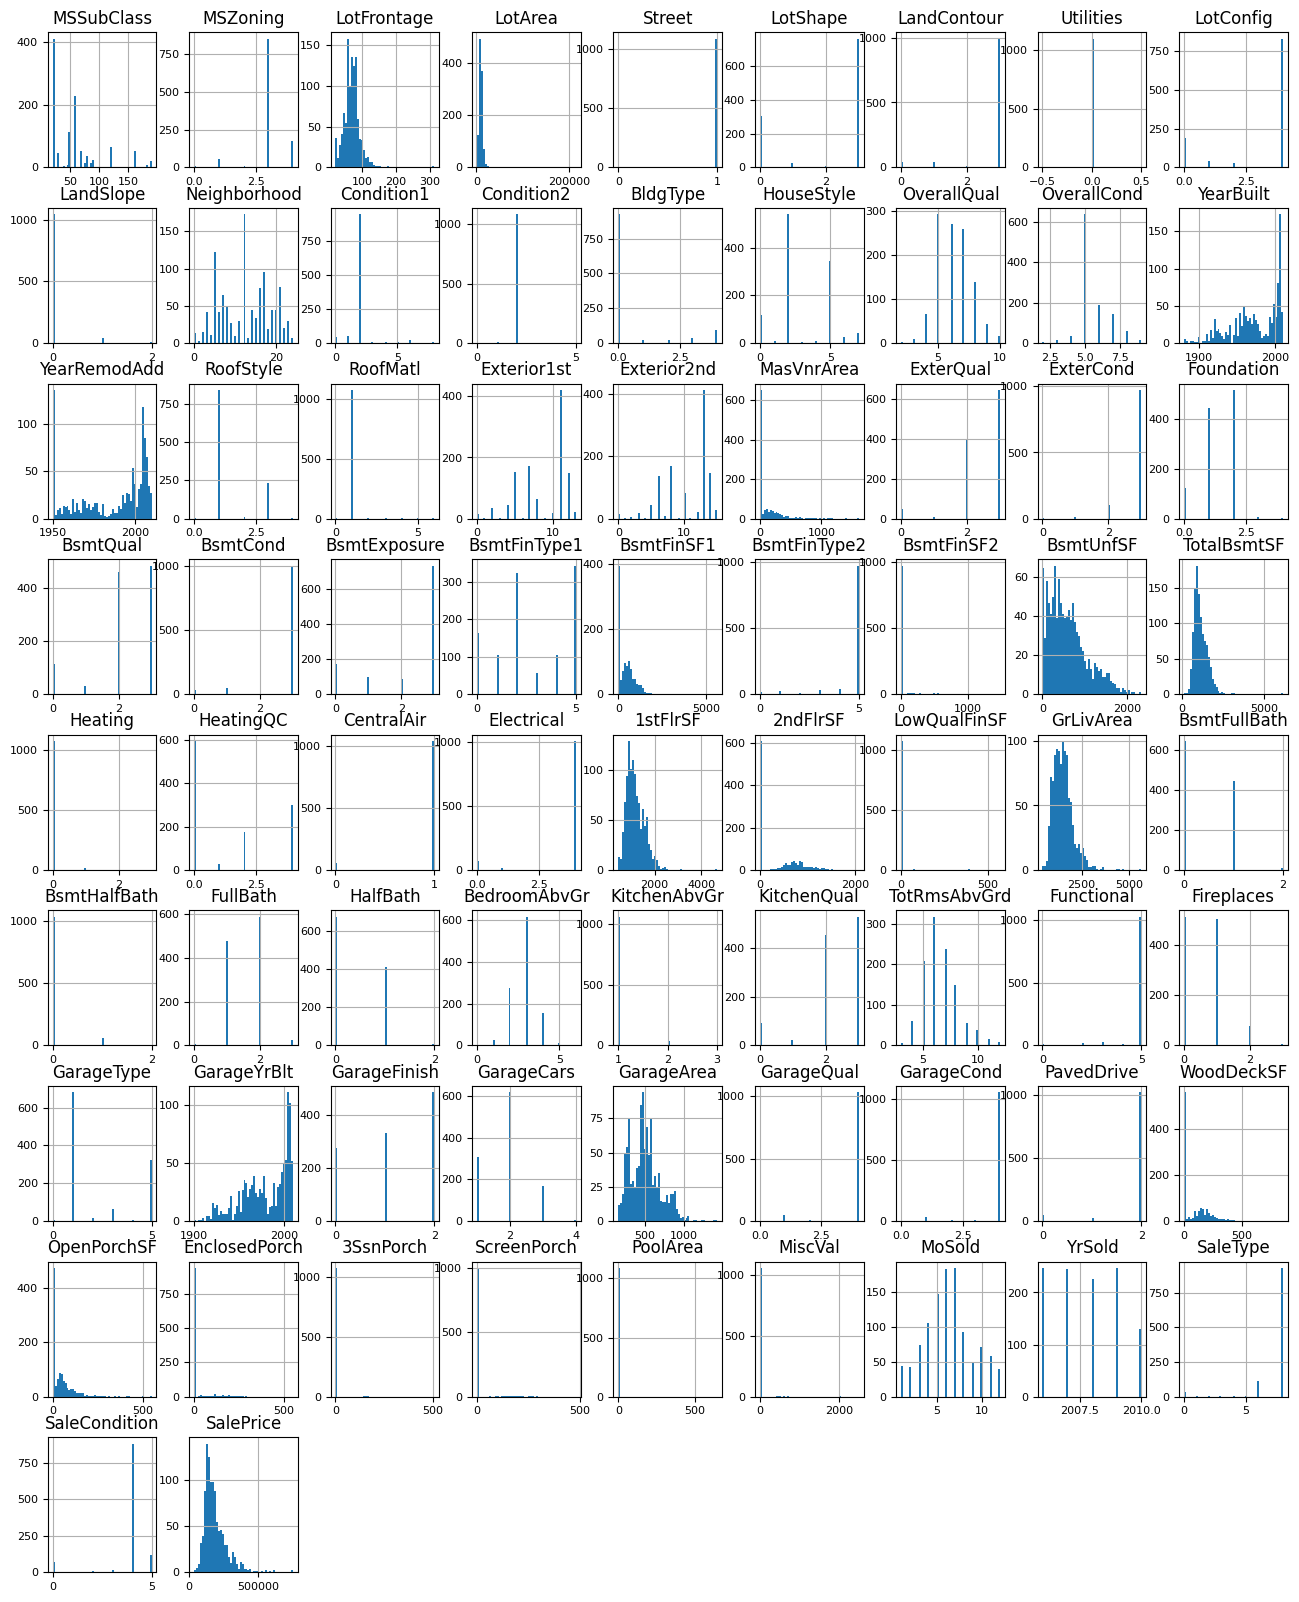

In [17]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [18]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [19]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: []
Numerical Columns: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [20]:
from sklearn.model_selection import train_test_split

y = df.SalePrice
X = df.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)


In [21]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(test_X)
model.score(test_X,test_y)

0.5698226847960357

In [22]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Calculate and print R^2 score.
r2 = r2_score(test_y, pred)
print(f"R-squared: {r2:.8f}")

# Calculate and print MSE.
mse = mean_squared_error(test_y, pred)
print(f"Mean squared error: {mse:.8f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.8f}")

# Calculate and print MEA.
mea = mean_absolute_error(test_y, pred)
print(f"Mean absolute error: {mea:.8f}")


# Calculate and print MAPE.
mape = mean_absolute_percentage_error(test_y, pred)
print(f"Mean absolute percentage error: {mape:.8f}")

R-squared: 0.56982268
Mean squared error: 2785238379.41045666
Root mean squared error: 52775.35769098
Mean absolute error: 22130.37890165
Mean absolute percentage error: 0.13277100


In [23]:
from sklearn.linear_model import Lasso

model=Lasso(alpha=0.01)
model.fit(train_X, train_y)
pred = model.predict(test_X)
model.score(test_X,test_y)

0.5698227659379296

In [24]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Calculate and print R^2 score.
r2 = r2_score(test_y, pred)
print(f"R-squared: {r2:.8f}")

# Calculate and print MSE.
mse = mean_squared_error(test_y, pred)
print(f"Mean squared error: {mse:.8f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.8f}")

# Calculate and print MEA.
mea = mean_absolute_error(test_y, pred)
print(f"Mean absolute error: {mea:.8f}")


# Calculate and print MAPE.
mape = mean_absolute_percentage_error(test_y, pred)
print(f"Mean absolute percentage error: {mape:.8f}")

R-squared: 0.56982277
Mean squared error: 2785237854.04682350
Root mean squared error: 52775.35271362
Mean absolute error: 22130.35163559
Mean absolute percentage error: 0.13277074


In [25]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=0.01)
model.fit(train_X, train_y)
pred = model.predict(test_X)
model.score(test_X,test_y)

0.5698311752169947

In [26]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Calculate and print R^2 score.
r2 = r2_score(test_y, pred)
print(f"R-squared: {r2:.8f}")

# Calculate and print MSE.
mse = mean_squared_error(test_y, pred)
print(f"Mean squared error: {mse:.8f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.8f}")

# Calculate and print MEA.
mea = mean_absolute_error(test_y, pred)
print(f"Mean absolute error: {mea:.8f}")


# Calculate and print MAPE.
mape = mean_absolute_percentage_error(test_y, pred)
print(f"Mean absolute percentage error: {mape:.8f}")

R-squared: 0.56983118
Mean squared error: 2785183407.08747196
Root mean squared error: 52774.83687410
Mean absolute error: 22130.64432426
Mean absolute percentage error: 0.13277492


In [27]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(train_X, train_y)
pred = model.predict(test_X)
model.score(test_X,test_y)


0.8120350354319887

In [28]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Calculate and print R^2 score.
r2 = r2_score(test_y, pred)
print(f"R-squared: {r2:.8f}")

# Calculate and print MSE.
mse = mean_squared_error(test_y, pred)
print(f"Mean squared error: {mse:.8f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.8f}")

# Calculate and print MEA.
mea = mean_absolute_error(test_y, pred)
print(f"Mean absolute error: {mea:.8f}")


# Calculate and print MAPE.
mape = mean_absolute_percentage_error(test_y, pred)
print(f"Mean absolute percentage error: {mape:.8f}")

R-squared: 0.81203504
Mean squared error: 1217003349.07508135
Root mean squared error: 34885.57508592
Mean absolute error: 20540.71244526
Mean absolute percentage error: 0.11875436


In [29]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

c:\Users\Jeremmy\OneDrive\문서\Python_Things\.venv312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [30]:
callback = EarlyStopping(monitor='loss',patience=3)

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=[len(train_X.to_numpy()[0])]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['mse'])
history = model.fit(train_X, train_y, epochs=200, verbose=0, batch_size=64, callbacks=[callback])

c:\Users\Jeremmy\OneDrive\문서\Python_Things\.venv312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
from sklearn.metrics import mean_squared_error as mse
pred = model.predict(test_X)
mse(pred, test_y)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


4105129472.0

In [32]:
from sklearn.metrics import mean_squared_error as mse
pred = model.predict(test_X)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [33]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Calculate and print R^2 score.
r2 = r2_score(test_y, pred)
print(f"R-squared: {r2:.8f}")

# Calculate and print MSE.
mse = mean_squared_error(test_y, pred)
print(f"Mean squared error: {mse:.8f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.8f}")

# Calculate and print MEA.
mea = mean_absolute_error(test_y, pred)
print(f"Mean absolute error: {mea:.8f}")


# Calculate and print MAPE.
mape = mean_absolute_percentage_error(test_y, pred)
print(f"Mean absolute percentage error: {mape:.8f}")

R-squared: 0.36596680
Mean squared error: 4105129472.00000000
Root mean squared error: 64071.28430116
Mean absolute error: 33459.48046875
Mean absolute percentage error: 0.18900859
